In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

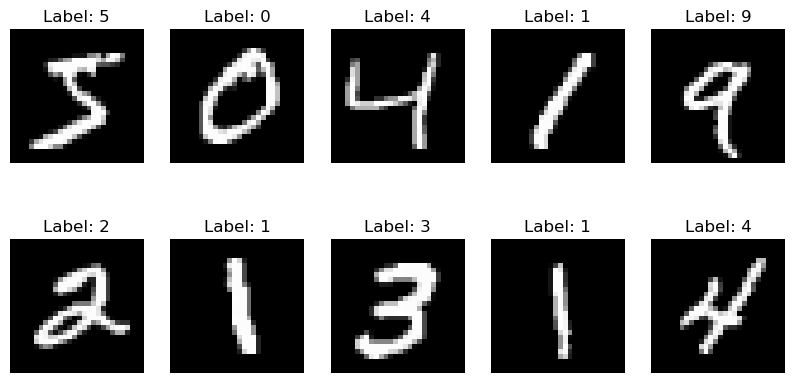

In [4]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Explicit input layer
    tf.keras.layers.Flatten(),  # Flatten 28x28 image to 1D array
    tf.keras.layers.Dense(128, activation="relu"),  # Fully connected layer
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer (10 classes)
])

In [7]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8582 - loss: 0.4876 - val_accuracy: 0.9566 - val_loss: 0.1435
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9533 - loss: 0.1554 - val_accuracy: 0.9690 - val_loss: 0.1016
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9666 - loss: 0.1084 - val_accuracy: 0.9734 - val_loss: 0.0850
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9731 - loss: 0.0852 - val_accuracy: 0.9745 - val_loss: 0.0820
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9765 - loss: 0.0754 - val_accuracy: 0.9775 - val_loss: 0.0732
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9794 - loss: 0.0638 - val_accuracy: 0.9790 - val_loss: 0.0716
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9814 - loss: 0.0568 - val_accuracy: 0.9795 - val_loss: 0.0702
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9854 - loss: 0.0451 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9793 - loss: 0.0690
Test Accuracy: 0.9793
Test Loss: 0.0690


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


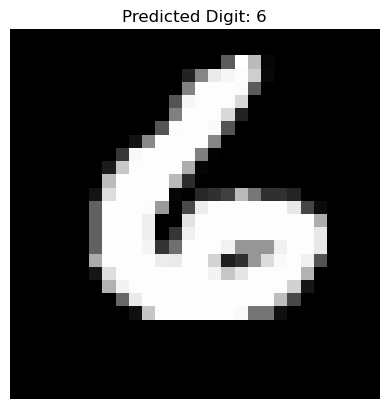

In [10]:
import numpy as np

index = np.random.randint(0, len(x_test))
test_image = x_test[index].reshape(1, 28, 28) 

# Predict the digit
predictions = model.predict(test_image)
predicted_label = np.argmax(predictions)  


import matplotlib.pyplot as plt

plt.imshow(x_test[index], cmap="gray")
plt.title(f"Predicted Digit: {predicted_label}")
plt.axis("off")
plt.show()


In [13]:

model.save("mnist_digit_classifier.keras", include_optimizer=False)

loaded_model = tf.keras.models.load_model("mnist_digit_classifier.keras")

loaded_model.compile(optimizer="adam",
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])

loss, acc = loaded_model.evaluate(x_test, y_test)
print(f"Loaded Model Accuracy: {acc:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.0835
Loaded Model Accuracy: 0.9793
